# Imports and setting up viz

NB : conda env1 on PC, lam1env on spirit (Python3.12)

In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_mapping import *
from tools_routing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor=(0, 0, 0, 0.3), facecolor='none')

# Load and edit files

LAM output analysis.

simu irr et simu no-irr.

In [3]:
date_min='2010-01-01'
date_max='2022-12-31'

## Sims


### LMDZ

In [4]:
#flag to use time series of each used variable instead of full outputs file
TS_flag=False

In [5]:
noirr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/noirr'
irr_dir='../../../JZ_simu_outputs/LAM/LAM_1500_60/irr'

In [6]:
#sim
if TS_flag:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(noirr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(noirr_dir)


sim0 = xr.open_mfdataset(filename)
sim0.attrs['name'] = 'no_irr'
sim = sim0.rename({'time_counter':'time'})
sim.attrs["plot_color"] = 'red'
sim = sim.sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))

sim['evap'] = sim['evap'] *3600 * 24
sim['evap'].attrs['units'] = 'mm d⁻¹'
sim['evap'].attrs['long_name'] = 'Evapotranspiration'

sim['precip'] = sim['precip'] *3600 * 24
sim['precip'].attrs['units'] = 'mm d⁻¹'
sim['precip'].attrs['long_name'] = 'Total precipitation'

sim['fluxsens']= -sim['sens']

sim['netrad'] = sim['LWdnSFC'] - sim['LWupSFC'] + sim['SWdnSFC'] - sim['SWupSFC']
sim['netrad'].attrs['units'] = 'W m⁻²'

sim['SWnetSFC'] = sim['SWdnSFC'] - sim['SWupSFC']
sim['SWnetSFC'].attrs['units'] = 'W m⁻²'

sim['LWnetSFC'] = sim['LWdnSFC'] - sim['LWupSFC']
sim['LWnetSFC'].attrs['units'] = 'W m⁻²'

sim['P - E'] = sim['precip'] - sim['evap']
sim['P - E'].attrs['units'] = 'mm d⁻¹'

sim['psol'] = sim['psol'] / 100
sim['psol'].attrs['units'] = 'hPa'

sim=compute_grid_cell_width(sim)
sim=add_moisture_divergence(sim)


if not TS_flag :
    sim['Altitude'] = sim['phis'] / 9.81
    sim['Altitude'].attrs['units'] = 'm'

sim

<xarray.Dataset> Size: 678MB
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                   (lon) float32 196B -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 316B 1.012e+05 1.009e+05 ... 1.483
  * time                  (time) datetime64[ns] 1kB 2010-01-16T12:00:00 ... 2...
    time_centered         (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_instant          (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/91)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    cell_width            (time, lat, lon) float32 1MB 2.571e+04 ... 2.283e+04
    cell_height           (time, lat, lon) float32 1MB 2.676e+04 ... 2.676e+04
    manual_area           (time, lat, lon) float32 1MB 6.881e+08 ... 6.108e+08
    moisture_divergence   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 33, 47), meta=np.ndarray>
    moisture_convergence  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 33, 47), meta=np.ndarray>
    Altitude              (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:17:56 GMT
    uuid:         15cc0aab-057e-451b-bf0c-046d80552902
    plot_color:   red

In [7]:
#sim irr
if TS_flag:
    filename = '{}/*/ATM/TS_MO/*.nc'.format(irr_dir)
else:
    filename = '{}/*/ATM/MO/*.nc'.format(irr_dir)

sim0irr = xr.open_mfdataset(filename)
sim0irr.attrs['name'] = 'irr'
simirr = sim0irr.rename({'time_counter':'time'})
simirr.attrs["plot_color"] = 'blue'
simirr = simirr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_min, lat_max))

simirr['evap'] = simirr['evap'] *3600 * 24
simirr['evap'].attrs['units'] = 'mm d⁻¹'

simirr['precip'] = simirr['precip'] *3600 * 24
simirr['precip'].attrs['units'] = 'mm d⁻¹'

simirr['fluxsens']= -simirr['sens']

simirr['netrad'] = simirr['LWdnSFC'] - simirr['LWupSFC'] + simirr['SWdnSFC'] - simirr['SWupSFC']
simirr['netrad'].attrs['units'] = 'W m⁻²'

simirr['SWnetSFC'] = simirr['SWdnSFC'] - simirr['SWupSFC']
simirr['SWnetSFC'].attrs['units'] = 'W m⁻²'

simirr['LWnetSFC'] = simirr['LWdnSFC'] - simirr['LWupSFC']
simirr['LWnetSFC'].attrs['units'] = 'W m⁻²'

simirr['P - E'] = simirr['precip'] - simirr['evap']
simirr['P - E'].attrs['units'] = 'mm d⁻¹'

simirr['psol'] = simirr['psol'] / 100
simirr['psol'].attrs['units'] = 'hPa'

simirr=compute_grid_cell_width(simirr)
simirr=add_moisture_divergence(simirr)

if not TS_flag:
    simirr['Altitude'] = simirr['phis'] / 9.81
    simirr['Altitude'].attrs['units'] = 'm'

simirr


<xarray.Dataset> Size: 678MB
Dimensions:               (lat: 35, lon: 49, presnivs: 79, time: 156,
                           axis_nbounds: 2)
Coordinates:
  * lat                   (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                   (lon) float32 196B -9.899 -9.615 -9.33 ... 3.468 3.752
  * presnivs              (presnivs) float32 316B 1.012e+05 1.009e+05 ... 1.483
  * time                  (time) datetime64[ns] 1kB 2010-01-16T12:00:00 ... 2...
    time_centered         (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_instant          (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/91)
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    phis                  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    aire                  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    contfracATM           (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                    ...
    cell_width            (time, lat, lon) float32 1MB 2.571e+04 ... 2.283e+04
    cell_height           (time, lat, lon) float32 1MB 2.676e+04 ... 2.676e+04
    manual_area           (time, lat, lon) float32 1MB 6.881e+08 ... 6.108e+08
    moisture_divergence   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 33, 47), meta=np.ndarray>
    moisture_convergence  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 33, 47), meta=np.ndarray>
    Altitude              (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 17:20:19 GMT
    uuid:         9b14cf09-a875-4aee-8765-fef8fb231424
    plot_color:   blue

### ORCHIDEE

In [8]:
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*sechiba_history.nc'.format(noirr_dir)

ORCnoirr0 = xr.open_mfdataset(filename)
ORCnoirr = ORCnoirr0.rename({'time_counter':'time'})
ORCnoirr.attrs['name'] = 'no_irr'
ORCnoirr.attrs['plot_color'] = "red"
ORCnoirr = ORCnoirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCnoirr['aei_sw'] = ORCnoirr['aei_sw'] * 100

ORCnoirr

<xarray.Dataset> Size: 494MB
Dimensions:                 (time: 156, axis_nbounds: 2, lat: 35, lon: 49,
                             veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                             solay: 11, snowlev: 3, albtyp: 2)
Coordinates:
  * lat                     (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 196B -9.899 -9.615 ... 3.468 3.752
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                   (solth) float32 72B 0.0004888 0.001955 ... 65.56
  * nobio                   (nobio) float32 4B 1.0
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev                 (snowlev) float32 12B 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 8B 1.0 2.0
    time_centered           (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 1kB 2010-01-16T12:00:00 ......
Dimensions without coordinates: axis_nbounds
Data variables: (12/122)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delfastr_daily          (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 2MB dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
Attributes:
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:37 GMT
    uuid:         58fb7df4-6705-43ed-8adf-55b70a468dac
    plot_color:   red

In [9]:
if TS_flag:
    filename = '{}/*/SRF/TS_MO/*.nc'.format(noirr_dir)
elif not TS_flag:
    filename = '{}/*/SRF/MO/*history.nc'.format(irr_dir)

ORCirr0 = xr.open_mfdataset(filename)
ORCirr = ORCirr0.rename({'time_counter':'time'})
ORCirr.attrs['name'] = 'irr'
ORCirr.attrs['plot_color'] = "#0C5DA5"
ORCirr = ORCirr.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))

ORCirr['aei_sw'] = ORCirr['aei_sw'] * 100

ORCirr

<xarray.Dataset> Size: 503MB
Dimensions:                 (time: 156, axis_nbounds: 2, lat: 35, lon: 49,
                             veget: 15, soiltyp: 3, solth: 18, nobio: 1,
                             solay: 11, snowlev: 3, albtyp: 2)
Coordinates:
  * lat                     (lat) float32 140B 35.69 35.93 36.17 ... 43.62 43.87
  * lon                     (lon) float32 196B -9.899 -9.615 ... 3.468 3.752
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * soiltyp                 (soiltyp) float32 12B 1.0 2.0 3.0
  * solth                   (solth) float32 72B 0.0004888 0.001955 ... 65.56
  * nobio                   (nobio) float32 4B 1.0
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * snowlev                 (snowlev) float32 12B 1.0 2.0 3.0
  * albtyp                  (albtyp) float32 8B 1.0 2.0
    time_centered           (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 1kB 2010-01-16T12:00:00 ......
Dimensions without coordinates: axis_nbounds
Data variables: (12/130)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    swnet                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    lwnet                   (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    ...                      ...
    DelSWE_daily            (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delfastr_daily          (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delslowr_daily          (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstreamr_daily        (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    delstock_routing_daily  (time, lat, lon) float32 1MB dask.array<chunksize=(1, 35, 49), meta=np.ndarray>
    soilalb_bg              (time, albtyp, lat, lon) float32 2MB dask.array<chunksize=(1, 2, 35, 49), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         3b44d854-98f3-4d70-81de-20074bb33431
    plot_color:   #0C5DA5

In [10]:
if not TS_flag:
    ORCnoirr['irrigmap_dyn'] = ORCirr['irrigmap_dyn']

    ORCnoirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCnoirr['irrig_frac'].attrs['units'] = '%'
    ORCirr['irrig_frac'] = ORCirr['irrigmap_dyn']/ORCirr['Areas'] * 100
    ORCirr['irrig_frac'].attrs['units'] = '%'

### Routing

In [11]:
rename_dict = {
        'time_counter' : 'time',
        'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_irrigation_r' : 'irrigation',
        'irrig_netereq_r' : 'netirrig'
        }

long_name_dict = {
        'streamr' : 'stream reservoir',
        'fastr' : 'fast reservoir',
        'slowr' : 'slow reservoir',
        'drainage' : 'drainage',
        'runoff' : 'runoff',
        'hydrographs' : 'hydrographs',
        'irrigation' : 'irrigation',
        'netirrig' : 'net irrigation'
        }

In [12]:
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(noirr_dir)
routing_noirr = xr.open_mfdataset(filename)

routing_noirr = routing_noirr.rename(rename_dict)
routing_noirr = routing_noirr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))

#add long name to variables
for var in routing_noirr.variables:
    if var in long_name_dict.keys():
        routing_noirr[var].attrs['long_name'] = long_name_dict[var]
from dateutil.relativedelta import relativedelta

#move data 1 month back to correct for output file convention
routing_noirr['time'] = routing_noirr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in routing_noirr['time'].values]
)

#add unit m³/s to hydrographs
routing_noirr['hydrographs'].attrs['units'] = 'm³/s'

routing_noirr.attrs['name'] = 'noirr'
routing_noirr.attrs['plot_color'] = 'red'

routing_noirr

<xarray.Dataset> Size: 5GB
Dimensions:              (time: 156, axis_nbounds: 2, lat: 480, lon: 840,
                          basins: 200)
Coordinates:
  * lat                  (lat) float32 2kB 43.99 43.97 43.96 ... 36.03 36.01
  * lon                  (lon) float32 3kB -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 51kB b'Amazon\x00                    ...
    time_instant         (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 1kB 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 250kB dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         noirr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:52:38 GMT
    uuid:         79bcbd35-667a-4675-8cc4-27b750cade0a
    plot_color:   red

In [13]:
filename = '{}/*/SRF/MO/*diag_routing_r.nc'.format(irr_dir)
routing_irr = xr.open_mfdataset(filename)

routing_irr = routing_irr.rename(rename_dict)
routing_irr = routing_irr.sel(lon=slice(lon_min, lon_max),lat=slice(lat_max, lat_min))

#add long name to variables
for var in routing_irr.variables:
    if var in long_name_dict.keys():
        routing_irr[var].attrs['long_name'] = long_name_dict[var]

#move data 1 month back to correct for output file convention
routing_irr['time'] = routing_irr['time'].copy(
    data=[(pd.Timestamp(t.item()) - relativedelta(months=1)).to_datetime64() for t in routing_irr['time'].values]
)

#add unit m³/s to hydrographs
routing_irr['hydrographs'].attrs['units'] = 'm³/s'

routing_irr.attrs['name']='irr'
routing_irr.attrs['plot_color'] = 'blue'

routing_irr

<xarray.Dataset> Size: 5GB
Dimensions:              (time: 156, axis_nbounds: 2, lat: 480, lon: 840,
                          basins: 200)
Coordinates:
  * lat                  (lat) float32 2kB 43.99 43.97 43.96 ... 36.03 36.01
  * lon                  (lon) float32 3kB -9.992 -9.975 -9.958 ... 3.975 3.992
  * basins               (basins) |S255 51kB b'Amazon\x00                    ...
    time_instant         (time) datetime64[ns] 1kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) datetime64[ns] 1kB 2010-01-01 ... 2022-12-01
Dimensions without coordinates: axis_nbounds
Data variables: (12/13)
    time_instant_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds  (time, axis_nbounds) datetime64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r               (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    runoff               (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    drainage             (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    fastr                (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    ...                   ...
    streamr              (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    hydrographs          (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    netirrig             (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    irrigation           (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
    basins_riverflow     (time, basins) float64 250kB dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area  (time, lat, lon) float64 503MB dask.array<chunksize=(1, 480, 840), meta=np.ndarray>
Attributes:
    name:         irr
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-24 16:54:51 GMT
    uuid:         308aaefd-83d8-48ed-9d6c-b3d74350cee0
    plot_color:   blue

## Obs

### GLEAM

In [14]:
filename = '../../../obs/GLEAMv4.1a/E/*'
gleam = xr.open_mfdataset(filename)
gleam.attrs['name'] = 'GLEAMv4.1a'
gleam.attrs['plot_color'] = 'black'
#restrict lon lat
gleam = gleam.sel(lon=slice(lon_min,lon_max),lat=slice(lat_max,lat_min))

gleam['evap']=convert_mm_per_month_to_mm_per_day(gleam['E'])
gleam['evap'].attrs['units'] = 'mm d⁻¹'
gleam

<xarray.Dataset> Size: 22MB
Dimensions:  (time: 156, lat: 85, lon: 140)
Coordinates:
  * time     (time) datetime64[ns] 1kB 2010-01-31 2010-02-28 ... 2022-12-31
  * lon      (lon) float64 1kB -9.95 -9.85 -9.75 -9.65 ... 3.65 3.75 3.85 3.95
  * lat      (lat) float64 680B 43.95 43.85 43.75 43.65 ... 35.75 35.65 35.55
Data variables:
    E        (time, lat, lon) float32 7MB dask.array<chunksize=(4, 85, 140), meta=np.ndarray>
    evap     (time, lat, lon) float64 15MB dask.array<chunksize=(4, 85, 140), meta=np.ndarray>
Attributes:
    name:        GLEAMv4.1a
    plot_color:  black

### GPCC

In [15]:
#gpcc
filename='../../../obs/precips/precip.mon.total.0.25x0.25.v2020.nc'
gpcc0=xr.open_mfdataset(filename)
gpcc0.attrs['name'] = 'GPCC'
gpcc=gpcc0.sel(time=slice(date_min,date_max))
gpcc['lon'] = ((gpcc['lon'] + 180) % 360) - 180
gpcc1 = gpcc.sortby('lon')

gpcc=gpcc1.sel(lon=slice(-13,6.25),lat=slice(lat_max, lat_min))

gpcc.attrs["plot_color"] = 'black'

gpcc['precip'] = convert_mm_per_month_to_mm_per_day(gpcc['precip'])
gpcc['precip'].attrs['units'] = 'mm d⁻¹'
gpcc

<xarray.Dataset> Size: 3MB
Dimensions:  (lat: 34, lon: 77, time: 120)
Coordinates:
  * lat      (lat) float32 136B 43.88 43.62 43.38 43.12 ... 36.12 35.88 35.62
  * lon      (lon) float32 308B -12.88 -12.62 -12.38 ... 5.625 5.875 6.125
  * time     (time) datetime64[ns] 960B 2010-01-01 2010-02-01 ... 2019-12-01
Data variables:
    precip   (time, lat, lon) float64 3MB dask.array<chunksize=(1, 34, 77), meta=np.ndarray>
Attributes:
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    Conventions:      CF 1.0
    dataset_title:    Global Precipitation Climatology Centre (GPCC)
    title:            GPCC Full Data Reanalysis Version 2020 0.25x0.25 Monthl...
    history:          Created 07/2021  based on V2020 data obtained via wget
    References:       https://www.psl.noaa.gov/data/gridded/data.gpcc.html
    name:             GPCC
    plot_color:       black

### Ebro irrig

In [16]:
load_Ebro_obs=False #false by default because it takes a lot of time to load

In [17]:
if (load_Ebro_obs):
    filename = '../../../obs/SM_based_inversion_approach_EBRO_Irrigation.nc'
    obsEbro = xr.open_dataset(filename)
    obsEbro = obsEbro.rename({'Time':'time'})
    obsEbro = obsEbro.rename({'Longitude':'lon'})
    obsEbro = obsEbro.rename({'Latitude':'lat'})
    obsEbro = obsEbro.rename({'Irrigation':'irrigation'})

    obsEbro = regrid_to_lon_lat(obsEbro)
    obsEbro.attrs['name'] = 'Ebro_estimate'
    obsEbro.attrs['plot_color'] = "black"

In [18]:
if load_Ebro_obs:
    #convert irrigation to mm d⁻¹
    obsEbro2=convert_mm_per_month_to_mm_per_day(obsEbro)
    obsEbro2['irrigation'].attrs['units'] = 'mm d⁻¹'

### Discharge

In [19]:
filename = '../../../obs/streamflow/GRDC-Monthly_Spain.nc'
obs_routing = xr.open_dataset(filename)
obs_routing

<xarray.Dataset> Size: 2MB
Dimensions:              (time: 1347, id: 186)
Coordinates:
  * time                 (time) datetime64[ns] 11kB 1912-01-01 ... 2024-03-01
  * id                   (id) int32 744B 6226100 6226200 ... 6228910 6228920
Data variables:
    runoff_mean          (time, id) float32 1MB ...
    flag                 (time, id) float32 1MB ...
    area                 (id) float32 744B ...
    country              (id) <U2 1kB ...
    geo_x                (id) float32 744B ...
    geo_y                (id) float32 744B ...
    geo_z                (id) float32 744B ...
    owneroforiginaldata  (id) <U103 77kB ...
    river_name           (id) <U19 14kB ...
    station_name         (id) <U40 30kB ...
    timezone             (id) float32 744B ...
Attributes:
    title:          Mean daily discharge (Q)
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Download from GRDC Database, 26/06/2024
    missing_value:  -999.000

## Masking, interpolation, and time period selection

### Sim masks

In [20]:
#continental fraction mask (LMDZ outputs)
con_mask=sim.mean(dim='time')['contfracOR']>0.95
ip_mask=polygon_to_mask(sim, iberian_peninsula) * con_mask

In [21]:
ip_sim = sim.where(ip_mask, drop=False)
ip_simirr = simirr.where(ip_mask, drop=False)

In [22]:
ip_ORCirr=ORCirr.where(ip_mask, drop=False)
ip_ORCnoirr=ORCnoirr.where(ip_mask, drop=False)

### Interpolation and filtering of products

In [23]:
if (load_Ebro_obs):
    ebro_mask = obsEbro['irrigation']>0
    ORCirr_iObsEbro = ORCirr.interp_like(obsEbro)
    ebro_ORCirr_iObsEbro = ORCirr_iObsEbro.where(ebro_mask)
    obsEbro_iORC = obsEbro.interp_like(ORCirr)
    ebro_mask_iORCirr = obsEbro_iORC['irrigation']>0
    ebro_ORCirr = ORCirr.where(ebro_mask_iORCirr)

In [24]:
#gleam
gleam_isim=gleam.interp_like(sim)
cont_gleam_isim=gleam_isim.where(con_mask)
ip_gleam_isim = cont_gleam_isim.where(ip_mask, drop=False)

In [25]:
#gpcc
gpcc_isim=gpcc.interp_like(sim)
cont_gpcc_isim=gpcc_isim.where(con_mask)
ip_gpcc_isim = cont_gpcc_isim.where(ip_mask, drop=False)

# Figures

## Fig 1 : Domain and altitude

In [26]:
import psyplot.project as psy
psy.rcParams['auto_show'] = True
mpl.rcParams['figure.figsize'] = [8, 6.]

In [27]:
LAM_dir='../../../JZ_simu_outputs/LAM/native_outputs/'
start_file='{}/espagne_start_2010.nc'.format(LAM_dir)
start=xr.open_dataset(start_file)
# start

In [28]:
start["Altitude"] = start["phis"]/9.81
start["Altitude"].attrs["units"] = "m"
start["Altitude"].attrs["long_name"] = "Altitude"
start["Altitude"].attrs["standard_name"] = "Altitude"

start_file2='{}/espagne_start_2010_modified.nc'.format(LAM_dir)
start.to_netcdf(start_file2)

In [29]:
start2=xr.open_dataset(start_file2)
# start2

In [30]:
# Custom colormap
terrain_colors = plt.cm.terrain(np.linspace(0, 1, 25))
filtered_colors = terrain_colors[5:]  
# Insert blue as the first color
filtered_colors = np.vstack([[0.07973856209150328, 0.44052287581699345, 0.8405228758169935, 1.0], filtered_colors]) 
custom_colormap = ListedColormap(filtered_colors)


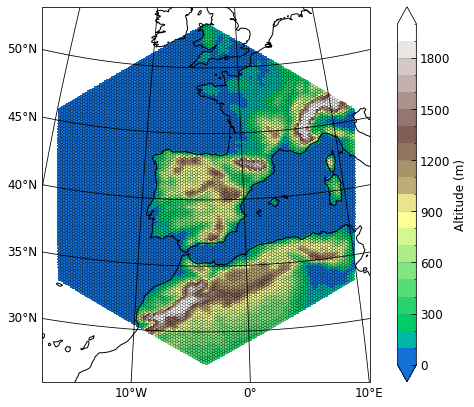

In [31]:
file=start_file2
var='Altitude'
vmin=-0
vmax=2000
pas=(vmax-vmin) / 20

map=psy.plot.mapplot(
    file, 
    name=var,
    datagrid=dict(color='k', linewidth=0.2),
    cbar='r',
    tight=True,
    lsm='50m',
    cmap=custom_colormap,
    extend='both',
    projection='ortho',
    xgrid=True,ygrid=True,
    bounds=np.arange(vmin, vmax + pas, pas),
    # title=var,
    clabel="Altitude (m)"
)

## Fig 2 : Stations and dams
NB : This figure was finally edited differently with the help of GIS engineer Aurélien Baro (METIS).

In [32]:
GIS_version=True

In [33]:
proper_stations_dict = {
    6226800: {'name': 'Tortosa',            'river': 'Ebro',            'lat_grid': 40.82500,   'lon_grid': 0.525007,   'station_nb': 1},
    6226400: {'name': 'Zaragoza',           'river': 'Ebro',            'lat_grid': 41.67499,   'lon_grid': -0.90832,   'station_nb': 2},
    6226300: {'name': 'Castejon',           'river': 'Ebro',            'lat_grid': 42.17499,   'lon_grid': -1.69165,   'station_nb': 3},
    6226600: {'name': 'Seros',              'river': 'Segre',           'lat_grid': 41.45833,   'lon_grid': 0.425007,   'station_nb': 4},
    6226650: {'name': 'Fraga',              'river': 'Cinca',           'lat_grid': 41.52499,   'lon_grid': 0.341674,   'station_nb': 5},
    6212410: {'name': 'Tore',               'river': 'Douro',           'lat_grid': 41.50833,   'lon_grid': -5.47499,   'station_nb': 6},
    6212700: {'name': 'Peral De Arlanza',   'river': 'Arlanza',         'lat_grid': 42.07500,   'lon_grid': -4.07499,   'station_nb': 7},
    6213700: {'name': 'Talavera',           'river': 'Tagus',           'lat_grid': 39.95833,   'lon_grid': -4.82499,   'station_nb': 8},
    6213800: {'name': 'Trillo',             'river': 'Tagus',           'lat_grid': 40.70833,   'lon_grid': -2.57499,   'station_nb': 9},
    6213900: {'name': 'Peralejos',          'river': 'Tagus',           'lat_grid': 40.59166,   'lon_grid': -1.92499,   'station_nb': 10},
    6216510: {'name': 'Azud de Badajoz',    'river': 'Guadiana',        'lat_grid': 38.86199,   'lon_grid': -7.01,      'station_nb': 11}, 
    6116200: {'name': 'Pulo do Lobo',       'river': 'Guadiana',        'lat_grid': 37.803,     'lon_grid': -7.633,     'station_nb': 12},         
    6216530: {'name': 'La Cubeta',          'river': 'Guadiana',        'lat_grid': 38.975,     'lon_grid': -2.895,     'station_nb': 13},         
    6216520: {'name': 'Villarubia',         'river': 'Guadiana',        'lat_grid': 39.125,     'lon_grid': -3.59073,   'station_nb': 14},      
    6216800: {'name': 'Quintanar',          'river': 'Giguela',         'lat_grid': 39.64166,   'lon_grid': -3.07499,   'station_nb': 15},
    6217140: {'name': 'Mengibar',           'river': 'Guadalquivir',    'lat_grid': 37.98425,   'lon_grid': -3.79939,   'station_nb': 16},     
    6217200: {'name': 'Arroyo Maria',       'river': 'Guadalquivir',    'lat_grid': 38.17905,   'lon_grid': -2.83594,   'station_nb': 17}, 
    6217700: {'name': 'Pinos Puente',       'river': 'Frailes',         'lat_grid': 37.27499,   'lon_grid': -3.75832,   'station_nb': 18},
}

#keeping only 5 representative stations for larger rivers, for simple figure
representative_stations_dict = {
    6226800: {'name': 'Tortosa',            'river': 'Ebro',            'lat_grid': 40.82500,   'lon_grid': 0.525007,   'station_nb': 1},
    6212410: {'name': 'Tore',               'river': 'Douro',           'lat_grid': 41.50833,   'lon_grid': -5.47499,   'station_nb': 6},
    6213700: {'name': 'Talavera',           'river': 'Tagus',           'lat_grid': 39.95833,   'lon_grid': -4.82499,   'station_nb': 8},
    6216510: {'name': 'Azud de Badajoz',    'river': 'Guadiana',        'lat_grid': 38.86199,   'lon_grid': -7.01,      'station_nb': 11}, 
    6217140: {'name': 'Mengibar',           'river': 'Guadalquivir',    'lat_grid': 37.98425,   'lon_grid': -3.79939,   'station_nb': 16},     
}

In [34]:
if not GIS_version:
    filename='../../../obs/Europe-dams_edited.ods'
    dams = pd.read_excel(filename, engine='odf')
    mask = dams['Country']=='Spain'
    dams = dams[mask]
    rename_dict = {
        'Name of dam': 'Name',
        'Decimal degree latitude': 'lat',
        'Decimal degree longitude': 'lon',
        'Reservoir capacity (million m3)' : 'capacity'
    }
    dams.rename(columns=rename_dict, inplace=True)

    #filter dams to keep only the biggest in Reservoir capacity (million m3) 
    # dams=dams.nlargest(50, 'capacity')
    dams

In [35]:
if not GIS_version:
    stations_map_dict(proper_stations_dict, river_cond=None, legend=True,
                            dams_df=dams, dam_nb=252, title=None,
                            extent=[-10, 2.5, 36, 44]
                            )

## Fig 3 : Irrigation maps

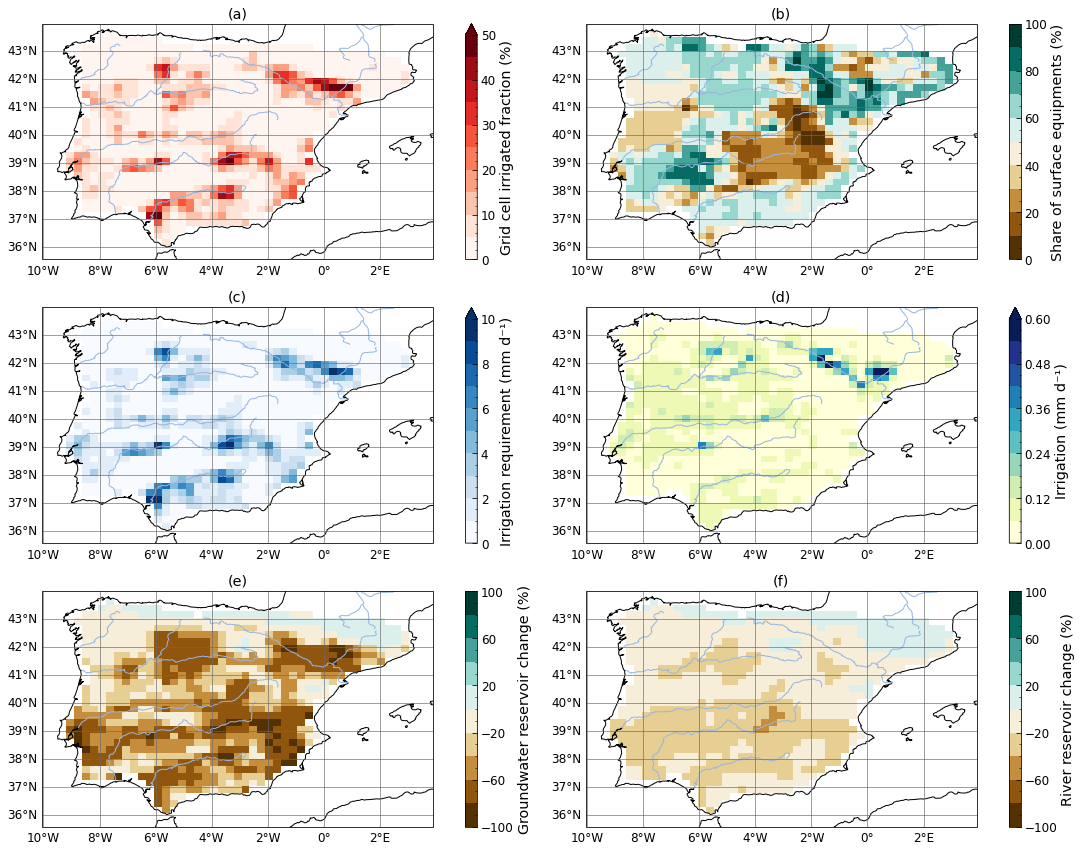

In [36]:
vars=['irrig_frac', 'aei_sw', 'netirrig', 'irrigation', 'slowr', 'streamr']
cmaps=[reds, emb_neutral, blues, wet, emb_neutral, emb_neutral]
vmins=[0, 0, 0, 0, -100, -100]
vmaxs=[50, 100, 10, 0.6, 100, 100]
clabels=['Grid cell irrigated fraction (%)',
         'Share of surface equipments (%)',
         'Irrigation requirement (mm d⁻¹)',
         'Irrigation (mm d⁻¹)',
         'Groundwater reservoir change (%)',
         'River reservoir change (%)']

fig, axes = plt.subplots(3, 2, figsize=(17,12), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()
for i in range(4):
    var=vars[i]
    plotvar=ip_ORCirr[var].mean(dim='time')
    ax=axes[i]
    cmap=cmaps[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    nice_map(plotvar, ax, cmap, vmin, vmax, clabel=clabel)
    title='({})'.format(letters[i])
    ax.set_title(title)

for i in range(4, 6):
    var=vars[i]
    rel_diff = (ip_ORCirr[var] - ip_ORCnoirr[var]).mean(dim='time') / ip_ORCnoirr[var].mean(dim='time') * 100
    plotvar= rel_diff
    ax=axes[i]
    cmap=cmaps[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    nice_map(plotvar, ax, cmap, vmin, vmax, clabel=clabel)
    title='({})'.format(letters[i])
    ax.set_title(title)

## Fig 4 : Irrig eval vs Dari et al

In [37]:
if load_Ebro_obs:
    var='irrigation'
    ds1=obsEbro2.sel(time=slice('2016-01-01','2020-07-31'))
    ds2=ebro_ORCirr_iObsEbro.sel(time=slice('2016-01-01','2020-07-31'))

In [38]:
if load_Ebro_obs:
    fig = plt.figure(figsize=(8.5, 9))
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

    # Seasonal cycle
    ax1 = fig.add_subplot(gs[0, 0]) 
    ylabel = 'Irrigation (mm d⁻¹)'

    plotvar1 = ds1[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
    color1 = 'black'
    label1 = 'Ebro_estimate'
    nice_time_plot(plotvar1, ax1, label=label1, color=color1, ylabel=ylabel)

    plotvar2 = ds2[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
    color2 = 'blue'
    label2 = 'irr'
    nice_time_plot(plotvar2, ax1, label=label2, color=color2, ylabel=ylabel)

    ax1.set_xticks(np.arange(1, 13))
    ax1.set_xticklabels(months_name_list)
    ax1.set_title('(a)')

    # Map
    ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
    plotvar = (ds2[var] - ds1[var]).mean(dim='time')
    cmap = emb_neutral
    vmin = -0.5
    vmax = 0.5
    clabel = 'Irrigation bias (mm d⁻¹)'

    nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel)
    ax2.set_title('(b)')

    plt.tight_layout()

In [39]:
if load_Ebro_obs:
    fig = plt.figure(figsize=(18, 6))  # Adjust the figure size to accommodate side-by-side plots
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Change to 1 row and 2 columns

    # Seasonal cycle
    ax1 = fig.add_subplot(gs[0, 0])  # First column
    ylabel = 'Irrigation (mm d⁻¹)'
    plotvar1 = ds1[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
    color1 = 'black'
    label1 = 'Ebro_estimate'
    nice_time_plot(plotvar1, ax1, label=label1, color=color1, ylabel=ylabel)
    plotvar2 = ds2[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
    color2 = 'blue'
    label2 = 'irr'
    nice_time_plot(plotvar2, ax1, label=label2, color=color2, ylabel=ylabel)
    ax1.set_xticks(np.arange(1, 13))
    ax1.set_xticklabels(months_name_list)
    ax1.set_title('(a)')

    # Map
    ax2 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())  # Second column
    plotvar = (ds2[var] - ds1[var]).mean(dim='time')
    cmap = emb_neutral
    vmin = -0.5
    vmax = 0.5
    clabel = 'Irrigation bias (mm d⁻¹)'
    nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel)
    ax2.set_title('(b)')

    plt.tight_layout()

### Computing mean in Ebro valley for simulated irrigation in Chap 3

In [40]:
def format_routing_ORC(filename, name, spinupyears, color=None):
    ds = xr.open_mfdataset(filename)
    ds = ds.rename({'time_counter': 'time'})
    ds.attrs['name'] = name
    ds = remove_years_efficiently(ds, spinupyears)

    #edit units and names
    if 'hydrographs' in ds:
        ds['hydrographs'].attrs['units'] = 'm³ s⁻¹'
        ds['hydrographs'].attrs['long_name'] = 'River discharge'
    if 'streamr' in ds:
        ds['streamr'].attrs['units'] = 'kg m⁻²'
        ds['streamr'].attrs['long_name'] = 'River reservoir volume'
    if 'slowr' in ds:
        ds['slowr'].attrs['units'] = 'kg m⁻²'
        ds['slowr'].attrs['long_name'] = 'GW reservoir volume'
    if 'fastr' in ds:
        ds['fastr'].attrs['units'] = 'kg m⁻²'
        ds['fastr'].attrs['long_name'] = 'Overland reservoir volume'

    if color is not None:
        ds.attrs['plot_color'] = color
    
    if 'coastalflow' in ds and 'riverflow' in ds:
        ds['coast_and_river'] = ds['coastalflow'] + ds['riverflow']
        ds['coast_and_river'].attrs['units'] = 'm³ s⁻¹'
        ds['coast_and_river'].attrs['long_name'] = 'Coastal and river flow'

    return ds

def format_routing_native(filename, name, spinupyears, color=None):
    ds = xr.open_mfdataset(filename)
    ds.attrs['name'] = name

    dict = {'time_counter' : 'time',
        'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_riverflow_r' : 'riverflow',
        'routing_coastalflow_r' : 'coastalflow'
        }
    ds = ds.rename(dict)
    ds = ds.isel(lon=slice(2,-2),lat=slice(2,-2))

    ds = remove_years_efficiently(ds, spinupyears)

    if color is not None:
        ds.attrs['plot_color'] = color

    #edit units and names
    ds['hydrographs'].attrs['units'] = 'm³/s'
    ds['hydrographs'].attrs['long_name'] = 'River discharge'
    return ds

def format_routing_nativeDIAG(filename, name, spinupyears, color=None):
    ds = xr.open_mfdataset(filename)
    ds.attrs['name'] = name

    dict = {'time_counter' : 'time',
            
            # for reservoirs
            'lat_domain_landpoints_routing':'lat',
            'lon_domain_landpoints_routing':'lon',
            # for drainage and runoff
            # 'lat_domain_landpoints':'lat',
            # 'lon_domain_landpoints':'lon',

            'routing_stream_reservoir' : 'streamr',
            'routing_fast_reservoir' : 'fastr',
            'routing_slow_reservoir' : 'slowr',
            'routing_drainage' : 'drainage',
            'routing_runoff' : 'runoff',
            'routing_riverflow' : 'riverflow',
            'routing_coastalflow' : 'coastalflow',
            'routing_irrigation' : 'irrigation',}
    #change the variables that exist according to the dictionary
    ds = ds.rename(dict)
    #remove first years to consider a spinup
    ds = remove_years_efficiently(ds, spinupyears)

    if color is not None:
        ds.attrs['plot_color'] = color

    return(ds)

In [41]:
spinupyears=[2000, 2001, 2002]
otherroutingdirdir='../../../JZ_simu_outputs/routing_native'
#open netcdf files for standard routing
filename = '{}/eval_halfdeg/nat16/nat16_sechiba_history_all.nc'.format(otherroutingdirdir)
name = 'subgrid_halfdeg, irr'
std_irr = format_routing_ORC(filename, name, spinupyears, color='purple')
std_irr_mean= std_irr.mean(dim=['time'])
std_irr_mean

<xarray.Dataset> Size: 2MB
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
Data variables: (12/92)
    Areas                   (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    Contfrac                (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    evap                    (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    coastalflow             (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    riverflow               (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    temp_sol                (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    ...                      ...
    Count_failure_stre      (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    root_deficit            (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    root_mc_fc              (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    irrigmap_dyn            (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    aei_sw                  (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    coast_and_river         (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>

In [42]:
#native with irrig
filename = '{}/eval_halfdeg/nat15/MO/nat15*_sechiba_history.nc'.format(otherroutingdirdir)
name = 'interp_topo, irr'
natORC_irr = format_routing_ORC(filename, name, spinupyears, color='green')

filename = '{}/eval_halfdeg/nat15/DA/nat15_*_routing.nc'.format(otherroutingdirdir)
name = 'interp_topo, irr'
natDIAG_irr = format_routing_nativeDIAG(filename, name, spinupyears, color='green')

natORC_irr['irrigation'] = natDIAG_irr['irrigation'] / natORC_irr['Areas'] * 2 * 24
natORC_irr['irrigation'].attrs['long_name'] = 'irrigation'
natORC_irr['irrigation'].attrs['units'] = 'mm d⁻¹'

natORC_irr_mean= natORC_irr.mean(dim=['time'])
natORC_irr_mean

<xarray.Dataset> Size: 2MB
Dimensions:                 (lat: 36, lon: 38, solay: 11, veget: 15, nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
Data variables: (12/85)
    Areas                   (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    Contfrac                (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    evap                    (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    coastalflow             (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    riverflow               (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    temp_sol                (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    ...                      ...
    root_deficit            (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    root_mc_fc              (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    irrigmap_dyn            (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    aei_sw                  (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    coast_and_river         (lat, lon) float32 5kB dask.array<chunksize=(36, 38), meta=np.ndarray>
    irrigation              (lat, lon) float64 11kB dask.array<chunksize=(36, 38), meta=np.ndarray>

In [43]:
obsEbro2_mean = obsEbro2.sel(time=slice('2016-01-01', '2019-12-31')).mean('time')
print("obsEbro2_mean:", obsEbro2_mean.mean(dim=['lon', 'lat']))

NameError: name 'obsEbro2' is not defined

In [ ]:
ebro_mask2 = obsEbro2_mean['irrigation'] > 0

In [ ]:
ebro_stdirr = std_irr_mean.interp_like(obsEbro2_mean).where(ebro_mask2)
ebro_stdirr.mean(dim=['lon', 'lat'])['irrigation'].values

In [ ]:
ebro_natORCirr = natORC_irr_mean.interp_like(obsEbro2_mean).where(ebro_mask2)
ebro_natORCirr.mean(dim=['lon', 'lat'])['irrigation'].values

In [ ]:
map_ave(ebro_stdirr, 'irrigation')

In [ ]:
map_ave(ebro_natORCirr, 'irrigation')

## Fig 5 : 5 stations

In [ ]:
#plot a seasonnal cycle for each station from representative_stations_dict
fig, axes= plt.subplots(3,2, figsize=(18,18))
axes= axes.flatten()
ds_list=[routing_noirr, routing_irr]
for i, (station_id, station_data) in enumerate(representative_stations_dict.items()):
    title_letter=letters[i]
    sc_station(obs_routing,axes[i], station_id, name=station_data['name'], ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022)
    sc_with_obs(ds_list, obs_routing, axes[i], station_id, station_data, ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022, title_letter=title_letter)

In [ ]:
savefig=False
#plot a seasonnal cycle for each station from representative_stations_dict
ds_list=[routing_noirr, routing_irr]
for i, (station_id, station_data) in enumerate(representative_stations_dict.items()):
    sc_station(obs_routing, station_id, name=station_data['name'],
               ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022)
    sc_with_obs(ds_list, obs_routing, station_id, station_data, 
                ylabel='River discharge (m³ s⁻¹)', year_min=2010, year_max=2022, 
                # title_letter=title_letter,
                title='off'
                )
    if savefig:
        plt.savefig('figures/chap4/f05_SC_{}.png'.format(station_data['name']), bbox_inches='tight', dpi=300)

## Fig 6 : ET and P eval vs GPCC and GLEAM

In [ ]:
fig = plt.figure(figsize=(18, 8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1.1,1,1.2], height_ratios=[1, 1])

vmin_p=-1
vmax_p= 1
vmin_et=-1
vmax_et= 1

#precip
date_min = '2010-01-01'
date_max = '2019-12-31'
ds_obs=ip_gpcc_isim.sel(time=slice(date_min,date_max))
ds_irr=ip_simirr.sel(time=slice(date_min,date_max))
ds_noirr=ip_sim.sel(time=slice(date_min,date_max))
var='precip'
# Seasonal cycle
ax1 = fig.add_subplot(gs[0,0])
ylabel="Precipitation (mm d⁻¹)"
plotvar1 = ds_obs[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'GPCC'
nice_time_plot(plotvar1, ax1, vmin=0, label=label1, color=color1, ylabel=ylabel)
plotvar2 = ds_noirr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'red'
label2 = 'no_irr'
nice_time_plot(plotvar2, ax1, vmin=0, label=label2, color=color2, ylabel=ylabel)
plotvar3 = ds_irr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color3 = 'blue'
label3 = 'irr'
nice_time_plot(plotvar3, ax1, vmin=0, vmax=3.5, label=label3, color=color3, ylabel=ylabel)
ax1.set_title('(a) Mean seasonnal cycle (2010-2019)')
ax1.set_xticks(np.arange(1, 13))
ax1.set_xticklabels(months_name_list)

#Diff
ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
plotvar=(ds_noirr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=vmin_p
vmax=vmax_p
clabel="Precipitation bias (mm d⁻¹)"
nice_map(plotvar, ax2, cmap, vmin, vmax, clabel=clabel, cbar_on=False)
ax2.set_title('(b) no_irr - GPCC')

ax3 = fig.add_subplot(gs[0,2], projection=ccrs.PlateCarree())
plotvar=(ds_irr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=vmin_p
vmax=vmax_p
clabel="Precipitation bias (mm d⁻¹)"
nice_map(plotvar, ax3, cmap, vmin, vmax, clabel=clabel, left_labels=False)
ax3.set_title('(c) irr - GPCC')


# #ET
date_min = '2010-01-01'
# date_max = '2022-12-31'
date_max = '2019-12-31' # to match with GPCC
ds_obs=ip_gleam_isim.sel(time=slice(date_min,date_max))
ds_irr=ip_simirr.sel(time=slice(date_min,date_max))
ds_noirr=ip_sim.sel(time=slice(date_min,date_max))
var='evap'
# Seasonal cycle
ax4 = fig.add_subplot(gs[1,0])
vmin=0
ylabel="Evapotranspiration (mm d⁻¹)"
plotvar1 = ds_obs[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color1 = 'black'
label1 = 'GLEAM'
nice_time_plot(plotvar1, ax4, vmin=0, label=label1, color=color1, ylabel=ylabel)
plotvar2 = ds_noirr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color2 = 'red'
label2 = 'no_irr'
nice_time_plot(plotvar2, ax4, vmin=0, label=label2, color=color2, ylabel=ylabel)
plotvar3 = ds_irr[var].mean(dim=['lon', 'lat']).groupby('time.month').mean(dim='time')
color3 = 'blue'
label3 = 'irr'
nice_time_plot(plotvar3, ax4, vmin=0, vmax=3.5, label=label3, color=color3, ylabel=ylabel)
ax4.set_title('(d) Mean seasonnal cycle (2010-2019)')
ax4.set_xticks(np.arange(1, 13))
ax4.set_xticklabels(months_name_list)

#Diff
ax5 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
plotvar=(ds_noirr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=vmin_et
vmax=vmax_et
clabel="Evapotranspiration bias (mm d⁻¹)"
nice_map(plotvar, ax5, cmap, vmin, vmax, clabel=clabel, cbar_on=False)
ax5.set_title('(e) no_irr - GLEAM')

ax6 = fig.add_subplot(gs[1,2], projection=ccrs.PlateCarree())
plotvar=(ds_irr[var]-ds_obs[var]).mean(dim='time')
cmap=emb_neutral
vmin=vmin_et
vmax=vmax_et
clabel="Evapotranspiration bias (mm d⁻¹)"
nice_map(plotvar, ax6, cmap, vmin, vmax, clabel=clabel, left_labels=False)
ax6.set_title('(f) irr - GLEAM')

plt.tight_layout()

## Fig 7 : Diffs irr - no_irr

In [47]:
#define evaporative fraction
ip_ORCnoirr['evap_frac'] = ip_ORCnoirr['fluxlat'] / (ip_ORCnoirr['fluxlat'] + ip_ORCnoirr['fluxsens'])
ip_ORCirr['evap_frac'] = ip_ORCirr['fluxlat'] / (ip_ORCirr['fluxlat'] + ip_ORCirr['fluxsens'])
# add units
ip_ORCnoirr['evap_frac'].attrs['units']=''
ip_ORCirr['evap_frac'].attrs['units']=''

Significance method 1: single sample t-test
Significance method 1: single sample t-test
Significance method 1: single sample t-test
Significance method 1: single sample t-test
Significance method 1: single sample t-test
Significance method 1: single sample t-test
Significance method 1: single sample t-test


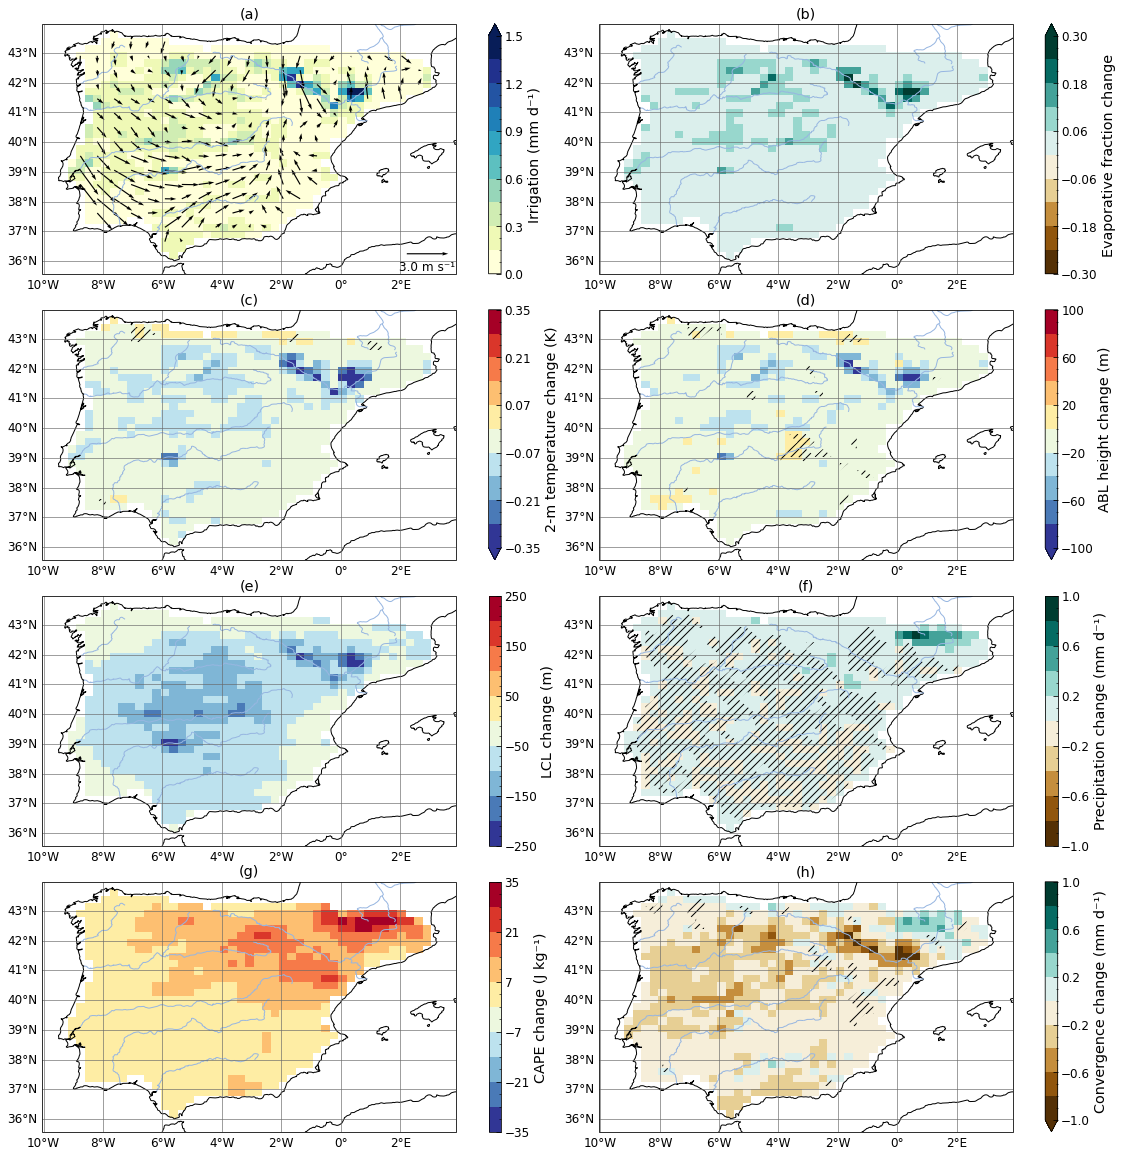

In [60]:
#With JJA irrig and wind
vars=['irrigation', 'evap_frac', 't2m', 's_pblh', 's_lcl', 'precip', 'cape', 'moisture_convergence']
vmins=[0  , -0.3, -0.35, -100, -250, -1, -35, -1]
vmaxs=[1.5,  0.3,  0.35,  100,  250,  1,  35,  1]
clabels=['Irrigation (mm d⁻¹)',
         'Evaporative fraction change',
         '2-m temperature change (K)',
         'ABL height change (m)',
         'LCL change (m)',
         'Precipitation change (mm d⁻¹)',
         'CAPE change (J kg⁻¹)', 
         'Convergence change (mm d⁻¹)']
cmaps=[wet, emb_neutral, emb, emb, emb, emb_neutral, emb, emb_neutral]

fig, axes = plt.subplots(4, 2, figsize=(17,16), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

months=[6, 7, 8]

i=0
map_wind(ip_simirr.sel(time=ip_simirr['time.month'].isin(months)), 
         axes[i], 
         extra_var=vars[i], 
         extra_ds=ip_ORCirr.sel(time=ip_ORCirr['time.month'].isin(months)).mean(dim='time'),
         height='10m', dist=2, scale=30,
         cmap=cmaps[i], vmin=vmins[i],vmax=vmaxs[i], clabel=clabels[i],
         quiver_inside=True)

pvalue=0.05
sig_method=1
check_norm=False
sig_viz=6
hatch='///'

for i in range(1,2):
    ds1=ip_ORCirr.sel(time=ip_ORCirr['time.month'].isin(months))
    ds2=ip_ORCnoirr.sel(time=ip_ORCnoirr['time.month'].isin(months))
    var=vars[i]
    diff = (ds1[var] - ds2[var]).mean(dim='time')
    plotvar= diff
    ax=axes[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    cmap=cmaps[i]
    sig_mask = compute_sig_mask(ds1, ds2, var, check_norm=check_norm, method=sig_method, pvalue=pvalue)
    nice_map(plotvar, ax, cmap=cmap, vmin=vmin, vmax=vmax, sig_mask=sig_mask, clabel=clabel, hatch=hatch)


for i in range(2, 8):
    ds1=ip_simirr.sel(time=ip_simirr['time.month'].isin(months))
    ds2=ip_sim.sel(time=ip_sim['time.month'].isin(months))
    var=vars[i]
    diff = (ds1[var] - ds2[var]).mean(dim='time')
    plotvar= diff
    ax=axes[i]
    vmin=vmins[i]
    vmax=vmaxs[i]
    clabel=clabels[i]
    cmap=cmaps[i]
    sig_mask = compute_sig_mask(ds1, ds2, var, check_norm=check_norm, method=sig_method, pvalue=pvalue)
    nice_map(plotvar, ax, cmap=cmap, vmin=vmin, vmax=vmax, sig_mask=sig_mask, clabel=clabel, hatch=hatch)


for i in range(8):
    title='({})'.format(letters[i])
    axes[i].set_title(title)

if True:
    plt.savefig('figures/chap4/article/f07_v2.png', bbox_inches='tight', dpi=300)

## Fig 8 : Scatter plot ET and P changes

In [ ]:
ds1=ip_ORCirr.mean(dim=['lon', 'lat'])
ds2=(ip_ORCirr - ip_ORCnoirr).mean(dim=['lon', 'lat'])

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(18,6))
axes=axes.flatten()
var1='irrigation'
xlabel='Irrigation (mm d⁻¹)'
seasons=['DJF', 'MAM', 'JJA', 'SON']

#evap vs irrig
ax=axes[0]
var2='evap'
ylabel='Evapotranspiration change (mm d⁻¹)'
title='(a)'
scatter_vars_seasons_ax(ax,ds1, ds2, var1, var2, reg=True, plot_one=True, title=title, coloring=True,
                      is_1D=True, seasons_list=seasons, xlabel=xlabel, ylabel=ylabel)
#precip vs irrig
ax=axes[1]
var2='rain'
ylabel='Precipitation change (mm d⁻¹)'
title='(b)'
scatter_vars_seasons_ax(ax,ds1, ds2, var1, var2, reg=True, plot_one=True, title=title, coloring=True,
                      is_1D=True, seasons_list=seasons, xlabel=xlabel, ylabel=ylabel)

## Fig 9 : Moisture budget by zone

### Define datasets and masks

In [61]:
# Define 2D masks
# Applied irrigation
irr_mask_low    = ip_ORCirr.mean(dim='time')['irrigation']<0.06
irr_mask_high   = ip_ORCirr.mean(dim='time')['irrigation']>0.12
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high) * ip_mask

In [62]:
# Define datasets orc
lowirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_low, dsname='lowirr_noirr')
lowirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_low, dsname='lowirr_irr')

medirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_med, dsname='medirr_noirr')
medirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_med, dsname='medirr_irr')

highirr_ip_ORCnoirr = apply_2Dmask_to_dataset(ip_ORCnoirr, irr_mask_high, dsname='highirr_noirr')
highirr_ip_ORCirr = apply_2Dmask_to_dataset(ip_ORCirr, irr_mask_high, dsname='highirr_irr')

In [63]:
# Temporal and spatial mean 
# for IP
ip_ORCnoirr_mean = ip_ORCnoirr.mean(dim=['time','lon','lat'])
ip_ORCirr_mean = ip_ORCirr.mean(dim=['time','lon','lat'])

#by irrig class
lowirr_ip_ORCnoirr_mean     = lowirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
lowirr_ip_ORCirr_mean       = lowirr_ip_ORCirr.mean(dim=['time','lon','lat'])
medirr_ip_ORCnoirr_mean     = medirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
medirr_ip_ORCirr_mean       = medirr_ip_ORCirr.mean(dim=['time','lon','lat'])
highirr_ip_ORCnoirr_mean    = highirr_ip_ORCnoirr.mean(dim=['time','lon','lat'])
highirr_ip_ORCirr_mean      = highirr_ip_ORCirr.mean(dim=['time','lon','lat'])

In [64]:
#diff
#over whole IP
ip_orc_diff_mean = ip_ORCirr_mean - ip_ORCnoirr_mean

#by irrig class
lowirr_ip_orc_diff_mean     = lowirr_ip_ORCirr_mean - lowirr_ip_ORCnoirr_mean
medirr_ip_orc_diff_mean     = medirr_ip_ORCirr_mean - medirr_ip_ORCnoirr_mean
highirr_ip_orc_diff_mean    = highirr_ip_ORCirr_mean -  highirr_ip_ORCnoirr_mean

### Compute and display data

In [65]:
compute_dict=True

In [66]:
if compute_dict:
    data_dict = {
        "Variable": ["Irrigation",  "ET change","P change"],
        "Low irrigation":               [0,0,0],
        "Medium irrigation":            [0,0,0],
        "High irrigation":              [0,0,0],
        "Iberian Peninsula":            [0,0,0]
    }
    # add average values for irrigation, ET chang and P change to dictionary
    data_dict['Low irrigation'][0] = lowirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Low irrigation'][1] = lowirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['Low irrigation'][2] = lowirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['Medium irrigation'][0] = medirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Medium irrigation'][1] = medirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['Medium irrigation'][2] = medirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['High irrigation'][0] = highirr_ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['High irrigation'][1] = highirr_ip_orc_diff_mean['evap'].compute().item()
    data_dict['High irrigation'][2] = highirr_ip_orc_diff_mean['rain'].compute().item()

    data_dict['Iberian Peninsula'][0] = ip_ORCirr_mean['irrigation'].compute().item()
    data_dict['Iberian Peninsula'][1] = ip_orc_diff_mean['evap'].compute().item()
    data_dict['Iberian Peninsula'][2] = ip_orc_diff_mean['rain'].compute().item()

    print(data_dict)
    
else:
    #variables already computed and saved for each subdataset (mm d⁻¹)
    data_dict = {'Variable': ['Irrigation', 'ET change', 'P change'],
                 'Low irrigation': [0.03250407055020332, 0.04089963436126709, 0.022051572799682617],
                 'Medium irrigation': [0.08199943602085114, 0.09069693088531494, 0.010108709335327148],
                 'High irrigation': [0.21001876890659332, 0.2211529016494751, 0.009575486183166504],
                 'Iberian Peninsula': [0.06673634797334671, 0.07550418376922607, 0.0167844295501709]
                 }


{'Variable': ['Irrigation', 'ET change', 'P change'], 'Low irrigation': [0.03250407055020332, 0.04089963436126709, 0.022051572799682617], 'Medium irrigation': [0.08199943602085114, 0.09069693088531494, 0.010108709335327148], 'High irrigation': [0.21001876890659332, 0.2211529016494751, 0.009575486183166504], 'Iberian Peninsula': [0.06673634797334671, 0.07550418376922607, 0.0167844295501709]}


In [67]:
#turn dict to df
irrZone_df = pd.DataFrame(data_dict)
irrZone_df

Variable  Low irrigation  Medium irrigation  High irrigation  \
0  Irrigation        0.032504           0.081999         0.210019   
1   ET change        0.040900           0.090697         0.221153   
2    P change        0.022052           0.010109         0.009575   

   Iberian Peninsula  
0           0.066736  
1           0.075504  
2           0.016784

In [68]:
#edit titles
irrZone_df['(a) Low irrigation'] = irrZone_df['Low irrigation']
irrZone_df['(b) Medium irrigation'] = irrZone_df['Medium irrigation']
irrZone_df['(c) High irrigation'] = irrZone_df['High irrigation']
irrZone_df['(d) Iberian Peninsula'] = irrZone_df['Iberian Peninsula']
irrZone_df.drop(columns=irrZone_df.columns[1:5], inplace=True) #drop 4 initial columns
irrZone_df


Variable  (a) Low irrigation  (b) Medium irrigation  (c) High irrigation  \
0  Irrigation            0.032504               0.081999             0.210019   
1   ET change            0.040900               0.090697             0.221153   
2    P change            0.022052               0.010109             0.009575   

   (d) Iberian Peninsula  
0               0.066736  
1               0.075504  
2               0.016784

In [ ]:
make_combined_figure9(
    irrZone_df,
    ip_ORCirr,
    irr_mask_low,
    irr_mask_med,
    irr_mask_high,
    domain_labels=('Low irrigation', 'Medium irrigation', 'High irrigation')
)
if True:
    plt.savefig('figures/chap4/article/f09_v2.png', bbox_inches='tight', dpi=300)

# Tables

## Table 1 : Gridded products
Not made using Python

## Tab 2 : Discharge stations

In [ ]:
#make csv from proper_stations_dict
filename='../../../obs/stations_data.csv'
df = pd.DataFrame(proper_stations_dict).T
df.to_csv(filename)

## Tab 3 : Change in evaluated metrics

In [ ]:
#compute all metrics on one station (necessary for later automatic use of metrics)
station_id, station = next(iter(proper_stations_dict.items()))
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
for metric_to_use in metric_list:
    metric_value=compute_metric_station(routing_noirr, obs_routing, station_id, station, metric_to_use)
    print('{} for station {} : {}'.format(metric_to_use.__short_name__, station['name'], metric_value))

In [ ]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=routing_noirr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='{} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs_routing, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_noirr=pd.DataFrame(df)
# set Station as index
df_noirr.set_index('Station', inplace=True)
df_noirr['Bias (%)'] = np.round(df_noirr['Bias (m³/s)'] / df_noirr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_noirr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_noirr = df_noirr[cols]
#add average row
df_noirr.loc['Mean'] = df_noirr.mean()
df_noirr.drop('Module (sim, m³/s)', axis=1, inplace=False)

In [ ]:
# output a pandas dataframe with all metric values for a given list of metrics and stations
sim=routing_irr
metric_list=[metric_sim_module, metric_obs_module, metric_bias, metric_rmse, metric_tcorr, metric_nse, metric_kge]
stations_dict=proper_stations_dict
# define dataframe with one row per station and one column per metric
df=[]
for station_id, station in stations_dict.items():
    label='{} ({})'.format(station['station_nb'],station['name'])
    df.append({'Station':label})
    for metric in metric_list:
        name=metric.__short_name__
        metric_value=compute_metric_station(sim, obs_routing, station_id, station, metric)
        metric_value=np.round(metric_value, 2)
        # append metric_value to df
        df[-1][name]=metric_value

# convert df to pandas dataframe
df_irr=pd.DataFrame(df)
# set Station as index
df_irr.set_index('Station', inplace=True)
df_irr['Bias (%)'] = np.round(df_irr['Bias (m³/s)'] / df_irr['Module (obs, m³/s)'], 3) * 100
#move Bias (%) to the 4th column
cols = df_irr.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
df_irr = df_irr[cols]
#add average row
df_irr.loc['Mean'] = df_irr.mean()
df_irr.drop('Module (obs, m³/s)', axis=1, inplace=False).drop('Module (sim, m³/s)', axis=1, inplace=False)

In [ ]:
df_diff=df_irr-df_noirr
df_diff['Bias change (%)'] = np.round(df_diff['Bias (m³/s)'] / df_noirr['Bias (m³/s)'], 3) * 100
df_diff['RMSE change (%)'] = np.round(df_diff['RMSE'] / df_noirr['RMSE'], 4) * 100
df_diff.drop('Module (obs, m³/s)', axis=1, inplace=True)
df_diff.drop('Module (sim, m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (m³/s)', axis=1, inplace=True)
df_diff.drop('Bias (%)', axis=1, inplace=True)
df_diff.drop('RMSE', axis=1, inplace=True)
df_diff

In [ ]:
#export to csv to put in latex
df_noirr.to_csv('figures/df_noirr.csv')
df_irr.to_csv('figures/df_irr.csv')
df_diff.to_csv('figures/df_diff.csv')

## Tab 4 : Subdomains of different irrigation intensity


Areas (computed here) and mean irrigation (see Fig.9)

Thresholds defined in Fig.9 as well, 0.06 mm d⁻¹ and 0.12 mm d⁻¹

```
irr_mask_low    = ip_ORCirr.mean(dim='time')['irrigation']<0.06
irr_mask_high   = ip_ORCirr.mean(dim='time')['irrigation']>0.12
irr_mask_med    = (~irr_mask_low) * (~irr_mask_high) * ip_mask
```

In [ ]:
ds_area= compute_grid_cell_width(ip_ORCirr)

mask1=irr_mask_low
mask_area_low=compute_mask_area(ds_area, mask1)

mask2=irr_mask_med
mask_area_med=compute_mask_area(ds_area, mask2)

mask3=irr_mask_high
mask_area_high=compute_mask_area(ds_area, mask3)

mask4=ip_mask
mask_area_ip=compute_mask_area(ds_area, mask4)

In [ ]:
#fraction of IP for each area
#low irr
lowirr_fraction=mask_area_low / mask_area_ip
#medium irr
medirr_fraction=mask_area_med / mask_area_ip
#high irr
highirr_fraction=mask_area_high / mask_area_ip
#total fraction of IP
ip_fraction=mask_area_ip / mask_area_ip
#print all
print('Low irrigation fraction: {}'.format(lowirr_fraction))
print('Medium irrigation fraction: {}'.format(medirr_fraction))
print('High irrigation fraction: {}'.format(highirr_fraction))
print('Iberian Peninsula fraction: {}'.format(ip_fraction))

# Appendix

In [ ]:
plot_appendix=True

## 18 stations time series (A1) and seasonal cycle (A2)

In [ ]:
if plot_appendix:
    #plot a time series for each station from dict
    fig, axes= plt.subplots(6,3, figsize=(20,28))
    axes= axes.flatten()
    ds_list=[routing_noirr, routing_irr]
    for i, (station_id, station_data) in enumerate(proper_stations_dict.items()):
                ts_station(obs_routing,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2017)
                ts_with_obs(ds_list, obs_routing, axes[i], station_id, station_data, year_min=2010, year_max=2017, plot_all_sim=True)

In [ ]:
if plot_appendix:
    #plot a time series for each station from dict
    fig, axes= plt.subplots(6,3, figsize=(20,28))
    axes= axes.flatten()
    ds_list=[routing_noirr, routing_irr]
    for i, (station_id, station_data) in enumerate(proper_stations_dict.items()):
        sc_station(obs_routing,axes[i], station_id, name=station_data['name'], year_min=2010, year_max=2017)
        sc_with_obs(ds_list, obs_routing, axes[i], station_id, station_data, year_min=2010, year_max=2017)